In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('total.csv', dtype={'BILL_LINE': str, 'ORIG_LINE': str})

# Group by state and calculate total messages and total revenue
state_summary = df.groupby(['TERM_ST', 'YEAR', 'MONTH']).agg({
    'CON_DATE': 'count',
    'REV_AMT': 'sum',
}).rename(columns={'CON_DATE': 'Total_Messages', 'REV_AMT': 'Total_Revenue'}).reset_index()

print(state_summary.head(10))



  TERM_ST  YEAR MONTH  Total_Messages  Total_Revenue
0      AK  1999   Apr             295        1846.31
1      AK  1999   Feb             293        1808.93
2      AK  1999   Jan             301        1871.56
3      AK  1999   Jun              43         268.66
4      AK  1999   Mar             283        1793.79
5      AK  1999   May              54         311.08
6      AK  2000   Jan             241        1544.32
7      AL  1999   Apr             271        1724.28
8      AL  1999   Feb             289        1878.81
9      AL  1999   Jan             287        1889.92


In [ ]:
 # Calculate the maximum monthly revenue for each state and understand how it relates to the average revenue


In [8]:
# Group by state, year, and month to calculate monthly revenue
state_monthly_revenue = df.groupby(['TERM_ST', 'YEAR', 'MONTH'])['REV_AMT'].sum().reset_index()

# Group by state to calculate max and average monthly revenue
state_revenue_summary = state_monthly_revenue.groupby('TERM_ST')['REV_AMT'].agg(['max', 'mean']).reset_index()

# Calculate the ratio of max to average revenue
state_revenue_summary['Max_to_Avg_Ratio'] = state_revenue_summary['max'] / state_revenue_summary['mean']

# Display the summary
print(state_revenue_summary.head(10))

  TERM_ST       max          mean  Max_to_Avg_Ratio
0      AK   1871.56   1349.235714          1.387126
1      AL   1889.92   1338.111429          1.412379
2      AR   1879.00   1367.537143          1.374003
3      AZ   2001.46   1447.794286          1.382420
4      CA  65416.60  47766.731429          1.369501
5      CO   2039.97   1485.112857          1.373613
6      CT   2052.09   1468.087143          1.397798
7      DE   1735.67   1259.098571          1.378502
8      FL   1848.77   1321.848571          1.398625
9      GA   1822.93   1303.535714          1.398450


In [ ]:
#PLATTING TOTAL MESSAGE AND REVENUE PER STATE

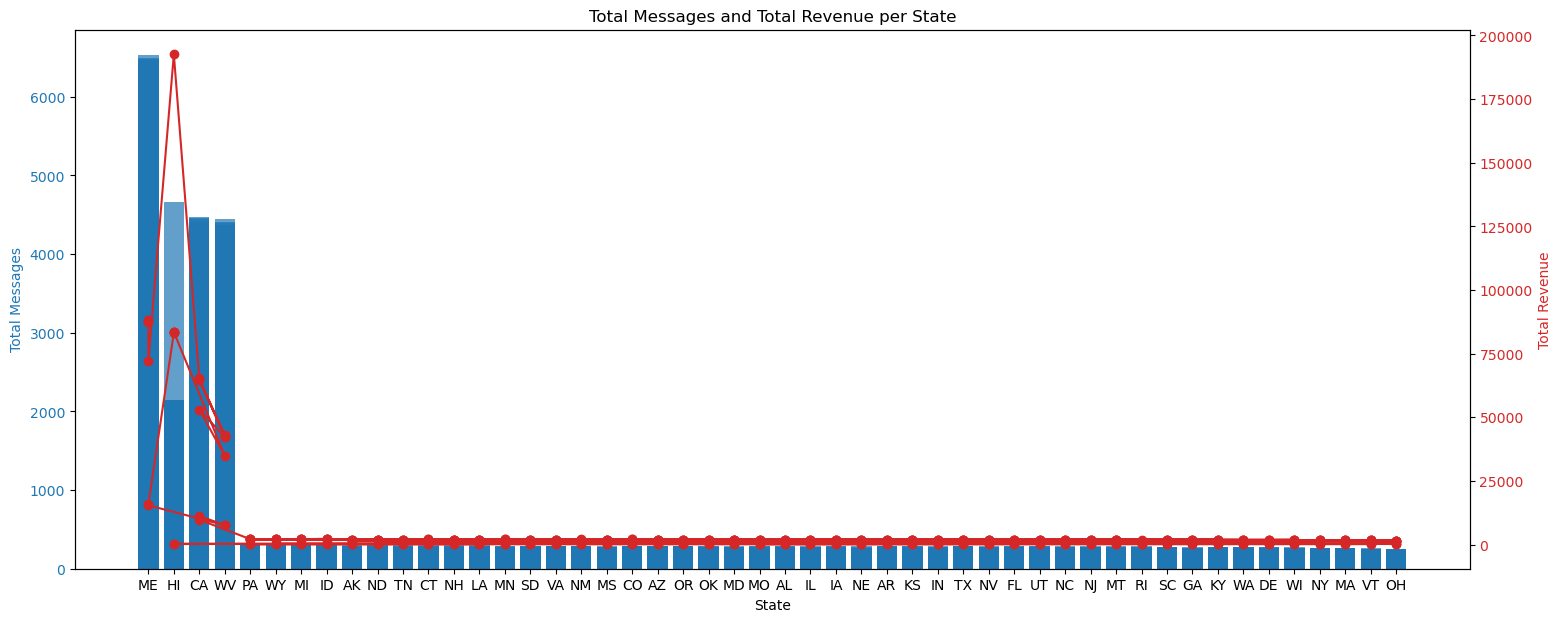

In [15]:
# Sort the DataFrame to better result in visualization
state_summary.sort_values('Total_Messages', ascending=False, inplace=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(18, 7))
# Creating a 2_axes bar plot to demanstrate 
# Bar plot for Total Messages
color = 'tab:blue'
ax1.set_xlabel('State')
ax1.set_ylabel('Total Messages', color=color)
ax1.bar(state_summary['TERM_ST'], state_summary['Total_Messages'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Total Revenue
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Revenue', color=color)
ax2.plot(state_summary['TERM_ST'], state_summary['Total_Revenue'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Set a title 
plt.title('Total Messages and Total Revenue per State')
plt.show()


In [ ]:
# Plotting Total Messages and Total Revenue per Month

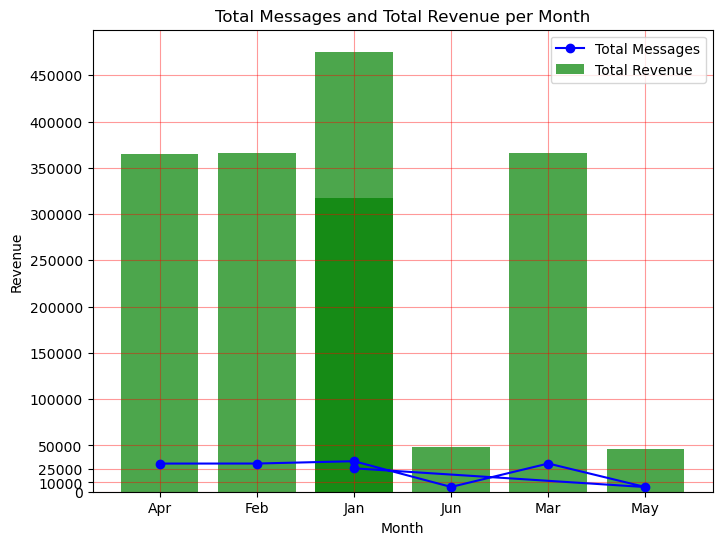

In [52]:
monthly_summary = df.groupby(['YEAR', 'MONTH']).agg({
    'CON_DATE': 'count',
    'REV_AMT': 'sum'
}).rename(columns={'CON_DATE': 'Total_Messages', 'REV_AMT': 'Total_Revenue'}).reset_index()

# Plotting both total messages and total revenue in the same figure
plt.figure(figsize=(8, 6))

# Line plot for total messages
plt.plot(monthly_summary['MONTH'], monthly_summary['Total_Messages'], marker='o', color='blue', label='Total Messages')

# Bar plot for total revenue
plt.bar(monthly_summary['MONTH'], monthly_summary['Total_Revenue'], color='green', alpha=0.7, label='Total Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Total Messages and Total Revenue per Month')
plt.legend()
# Do yticket manually becouse Message and Revenue don't have near amount
plt.yticks([0, 10000, 25000, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000]) 
plt.grid(True, color='red', alpha=0.4)

plt.show()

In [ ]:
# Plotting Distribution of tTotal Message and Revenue over Months

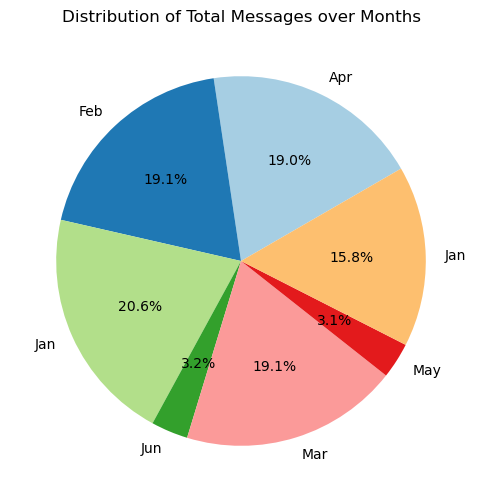

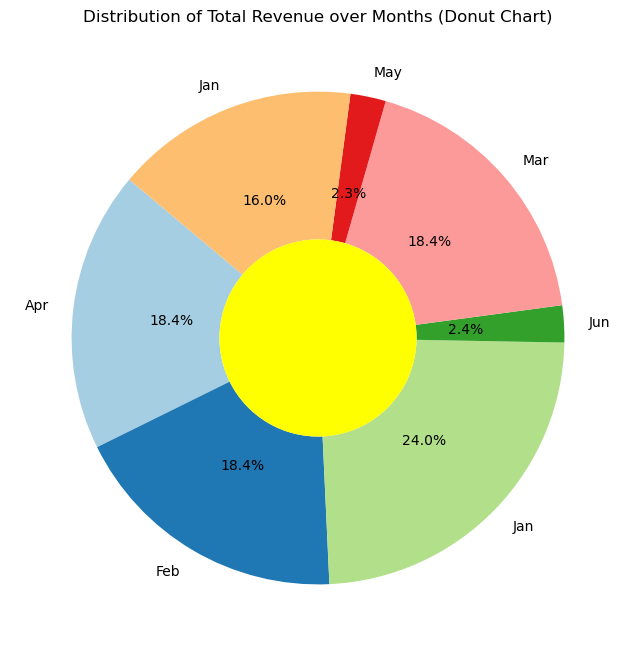

In [35]:
# Plotting a pie chart for dimonstrating total messages distribution
plt.figure(figsize=(6, 6))
plt.pie(monthly_summary['Total_Messages'], labels=monthly_summary['MONTH'], autopct='%1.1f%%', startangle=30, colors=plt.cm.Paired.colors)
plt.title('Distribution of Total Messages over Months')
plt.show()

# Plotting a donut chart for total revenue
plt.figure(figsize=(8, 8))
plt.pie(monthly_summary['Total_Revenue'], labels=monthly_summary['MONTH'], autopct='%1.1f%%', startangle=140,
        wedgeprops=dict(width=0.6), colors=plt.cm.Paired.colors)
plt.title('Distribution of Total Revenue over Months (Donut Chart)')
plt.gca().add_artist(plt.Circle((0, 0), 0.4, fc='yellow'))
plt.show()